In [131]:
import numpy as np
import pandas as pd
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

In [132]:
df = pd.read_csv('data/Train.csv') # Load only training dataset since test set is not labelled, split training set later to create test set
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
df_standard = pd.DataFrame(StandardScaler().fit_transform(df.iloc[:,:3]), columns=df.columns[:3]) # Standardize first 3 features around their means
df = pd.concat([df_standard, df.iloc[:,3:]], axis=1)
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,0.840212,0.257373,-0.399500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.592807,-0.335743,0.159030,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.822300,0.180345,-0.418095,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.234552,-0.666963,-0.530918,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.736109,0.827381,3.521156,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,-0.933149,-0.967373,-0.311887,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,-0.234552,0.565486,0.345206,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,0.768561,0.704136,-0.252574,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,-0.664458,-0.351148,0.358895,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
x = df.drop('Class', axis=1) # Every take out label for x-values
y = df.Class # Take only labels as y-values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1) # Split data set into train and test sets with an 80:20 split

In [135]:
model = RandomForestClassifier(max_depth=4, max_features=3)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, max_features=3)

**Training Set**

Train Score:  0.9177304964539007 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1294
           1       0.00      0.00      0.00       116

    accuracy                           0.92      1410
   macro avg       0.46      0.50      0.48      1410
weighted avg       0.84      0.92      0.88      1410



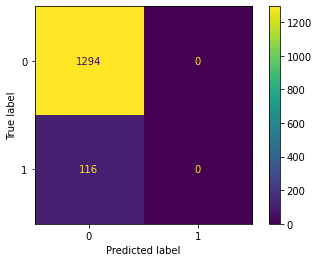

In [136]:
warnings.filterwarnings('ignore')
y_pred = model.predict(x_train)

print('Train Score: ', model.score(x_train, y_train), '\n')
plot_confusion_matrix(model, x_train, y_train)
print(classification_report(y_train, y_pred))

**Test Set**

Test Score:  0.9235127478753541 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       326
           1       0.00      0.00      0.00        27

    accuracy                           0.92       353
   macro avg       0.46      0.50      0.48       353
weighted avg       0.85      0.92      0.89       353



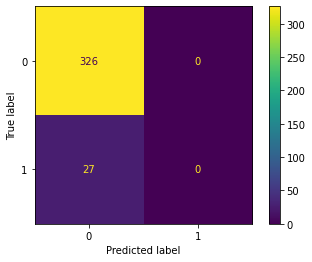

In [137]:
warnings.filterwarnings('ignore')
y_pred = model.predict(x_test)

print('Test Score: ', model.score(x_test, y_test), '\n')
plot_confusion_matrix(model, x_test, y_test)
print(classification_report(y_test, y_pred))